In [20]:
import pandas as pd
import numpy as np
import json
import os
from src.features import generate_features
import tweepy
import datetime
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
with open('./config/viz_params.json') as f:
    viz_params = json.load(f)
# Cfg variables
path = viz_params['path']
top_k = viz_params['top_k']
top_k_fig_path = viz_params['top_k_fig_path']
user_hist_path = viz_params['user_hist_path']
user_hist_zoom_path = viz_params['user_hist_zoom_path']
good_path = viz_params['good_path']
bad_path = viz_params['bad_path']
good_tags = viz_params['good_tags']
bad_tags = viz_params['bad_tags']

with open('./config/polarity.json') as f:
    polarity_params = json.load(f)  
top_k = polarity_params['top_k']
api_keys = polarity_params['api_keys']
marker_tags = polarity_params['marker_tags']
max_posts = polarity_params['max_posts']
start_date = polarity_params['start_date']
end_date = polarity_params['end_date']
date_pattern = polarity_params['twitter_date_pattern']
max_iter = polarity_params['max_iter']
toi_con = polarity_params['toi_con']
num_retrieve_con = polarity_params['num_retrieve_con']
toi_sci = polarity_params['toi_sci']
con_path = polarity_params['con_path']
sci_path = polarity_params['sci_path']

with open(api_keys) as f:
    keys = json.load(f)
consumer_key = keys['consumer_key']
consumer_secret = keys['consumer_secret']
access_token = keys['access_token']
access_token_secret = keys['access_token_secret']    

# this needs a place to fit in
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
marker_tags

['WuhanVirus', 'hoax']

In [4]:
jsons = [os.path.join(path, name) for name in sorted(os.listdir(path)) if 'dataset' in name]

# Hashtag Polarity
* b = Baseline ROF (rate of frequency) = num top 200 / num tweets
* m = Marker ROF = num top 200 / num subset tweets (ones containing marker tweets)
* hashtag polarity = (m-b)/b

In [16]:
ht_polarity = generate_features.hashtag_polarity(jsons, top_k, marker_ht = marker_tags)

polarity mode
there are 1044009 tweets and 543 subset tweets


In [17]:
ht_polarity.head()

COVID19        0.068193
coronavirus    0.650984
Covid19        0.180114
Coronavirus    0.456768
covid19       -0.105819
dtype: float64

In [39]:
ht_polarity.to_json('ht_polarity.json')

In [7]:
ht_polarity= pd.read_json('ht_polarity.json', typ='series')

# User Polarity

In [7]:
users =  generate_features.collect_all_users(jsons)

In [8]:
example_user = 'DrMeghanWalls'

In [9]:
norm_pol = generate_features.user_polarity(api, example_user,
                                           set(ht_polarity.index), 
                                           start_date, end_date, date_pattern,
                                           ht_polarity, 
                                           max_posts = max_posts, 
                                           max_iter=max_iter,
                                          )

investigating DrMeghanWalls


In [10]:
norm_pol

-0.48741066089903107

# Inquiry on a single tweet

In [8]:
retweets = api.retweets(toi_con, num_retrieve_con)

In [10]:
up_dict = generate_features.investigate_retweets(api, toi_sci, num_retrieve_con,
                                           set(ht_polarity.index), 
                                           start_date, end_date, date_pattern,
                                           ht_polarity, sci_path,
                                           max_posts = max_posts, 
                                           max_iter=max_iter)

investigating sumidatomohisa
0.0 00 tweets qualified Thu Nov 19 14:35:08 +0000 2020
investigating CLPServicesLLC


/datasets/home/home-00/17/617/shl636/dsc180_project_structure/src/features/generate_features.py:154: RuntimeWarning: invalid value encountered in double_scalars
  u_pol /= num_norm_tweets


0.0681931298 1lified Tue Jun 02 04:35:18 +0000 2020
investigating BaumhartCaitlin
66.89601675189999 50fied Mon Jun 01 18:59:34 +0000 2020
investigating nursevictoria11379998
0.0 00 tweets qualified Mon Oct 12 08:15:35 +0000 2020
investigating Lil_JRice
0.0 00 tweets qualified Tue Nov 24 22:28:42 +0000 2020
investigating MALGOHARY1
4.3961998473 9 qualified Sun Jul 10 23:11:00 +0000 2011
investigating maki_krmr70000003
0.0 0200 tweets qualified Fri Sep 25 13:16:35 +0000 2020
investigating timwlsn31
6.9565653916 21qualified Tue Sep 22 20:54:30 +0000 2020
investigating tedwlsn314761904
-6.249875572200001 15ied Tue Sep 22 21:12:31 +0000 2020
investigating Saudi_Pharma_07
0.0 00 tweets qualified Sat Oct 10 20:26:54 +0000 2020
investigating LefkoRodi
0.0893305996 1 qualified Thu Sep 10 07:05:57 +0000 2020
investigating tomwlsn31
-9.1134893126 21ualified Tue Sep 22 20:42:34 +0000 2020
investigating JohnDoe47564694
24.451098767999998 15ied Tue Aug 25 20:30:24 +0000 2020
investigating mefromfair

In [11]:
up_dict_con = generate_features.investigate_retweets(api, toi_con, num_retrieve_con,
                                           set(ht_polarity.index), 
                                           start_date, end_date, date_pattern,
                                           ht_polarity, con_path,
                                           max_posts = max_posts, 
                                           max_iter=max_iter)

investigating jhorne24746260
0.0 00 tweets qualified Thu Nov 26 19:00:05 +0000 2020
investigating whatsoever7276
0.0 00 tweets qualified Sat Nov 07 18:45:22 +0000 2020
investigating pilskin007
0.0 0 tweets qualified Wed Dec 02 01:32:14 +0000 2020
investigating haykutuludag
41.797295677 1 qualified Sun Jul 12 15:52:17 +0000 2020
investigating sunnylogan12
0.0 0 tweets qualified Fri Apr 03 15:36:52 +0000 2020
investigating karni_Sena_JK
0.0 051 tweets qualified Thu Mar 26 20:50:11 +0000 2020 147 tweets qualified Fri Mar 27 15:51:21 +0000 2020
investigating EllaHea16113314
13.746046828299999 1ified Fri Jul 10 06:11:06 +0000 2020
investigating L_Lrong46046828299999
0.0 0weets qualified Wed Oct 07 04:45:18 +0000 2020
investigating A_Sadhwani123
0.0 00 tweets qualified Mon Oct 26 12:58:38 +0000 2020
investigating sassylabrie
0.0 099 tweets qualified Tue Sep 29 05:04:06 +0000 2020
investigating VLovesAnimals
0.0 00 tweets qualified Wed Dec 02 13:24:07 +0000 2020
investigating BrieRudd
0.0 00 

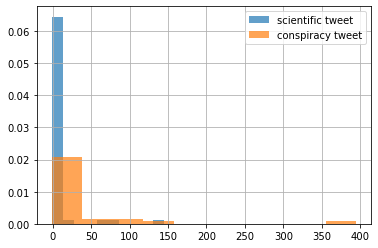

In [29]:
pd.Series(up_dict).dropna().hist(density=1, label = 'scientific tweet', alpha=0.7)
pd.Series(up_dict_con).dropna().hist(density = 1, label = 'conspiracy tweet', alpha=0.7)

plt.legend()

# LETS GOOOOOOO